In [0]:
import numpy as np
import math
from numpy import linalg as al
import matplotlib.pyplot as plt 

def adjust_function(x,y,grau):
    """
    X = (A.T * A)^(-1) * A.T * b
    onde X é o vetor das constantes e A é a matrix dos coeficientes 
    e "b" é o vetor de f(x)
    dado a0*x**0 + a1*x**1 + a2*x**2...
    retorna um vetor com [a0, a1, a2, a3] e uma função g aproximada e uma função exp
    
    """
    tmp = []
    for i in range(grau + 1):
        tmp.insert(0,x**i)
    A = np.array(tmp).T
    
    X = al.inv(np.dot(A.T, A)) # (A.T * A) ^ -1
    X = np.dot(X, A.T) # (A.T * A) ^ -1 * A.T
    X = np.dot(X, y.T) # (A.T * A) ^ -1 * A.T * b
    X = X[::-1]
    
    #a = ((np.linalg.inv((A.transpose()).dot(A))).dot(A.transpose())).dot(y)
    
    def g(x):
        res = 0
        for i in (range(0, grau+1)):
            res += X[i] * (x**i)
        return res
    
    def g_exp(x):
        r = 1
        for i in reversed(range(0, grau+1)):
            if i == 0:
                r *= X[i]
            else:
                r *= np.power(math.e, X[i]*x)
                #r *= math.e**(X[i] * x)
        return r
    
    return X, g, g_exp

Exemplo 1 Slide
a = 1.6000000000000003, b = 1.4999999999999996
g(3) = 6.300000000000001


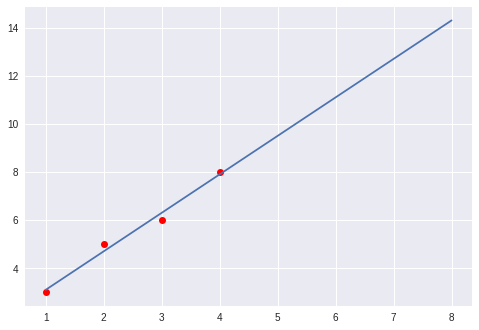

Exemplo 2 Slide
a = -289.0243902439026, b = 2646.9512195121947
g(5) = 1201.8292682926817
g(6) = 912.8048780487793
g(7) = 623.7804878048767
g(8) = 334.756097560974


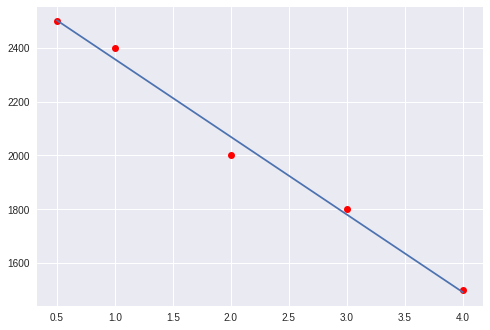

Exemplo quadrático UFRGS


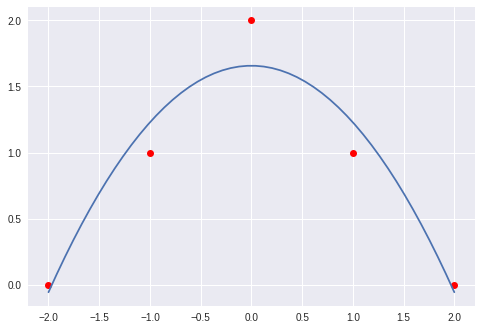

Exercício 1
a = 0.012888919295256367, b = -48.71628029197163, c = 46044.7745561689


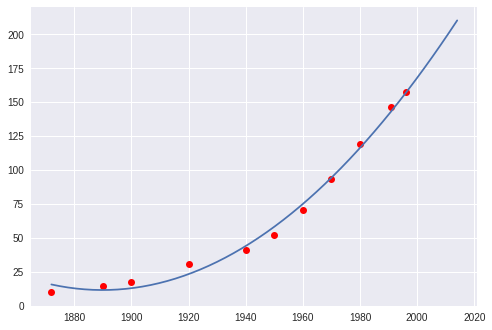

g(2000) = 167.89115325111197
g(2005) = 182.4103606787612
g(2014) = 210.16893787973095
Exercício 1 Exponencial
a = 1.1838342789962333, b = -2231.495882533671


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in power


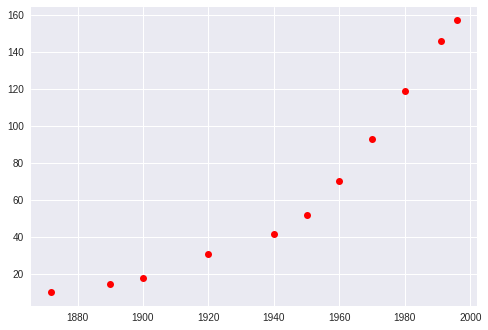

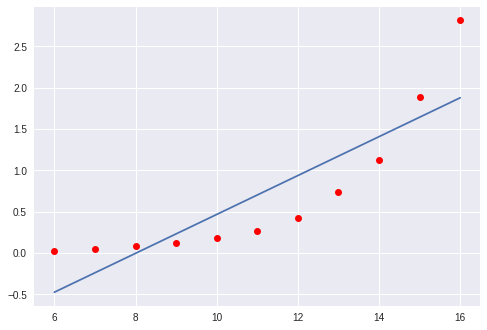

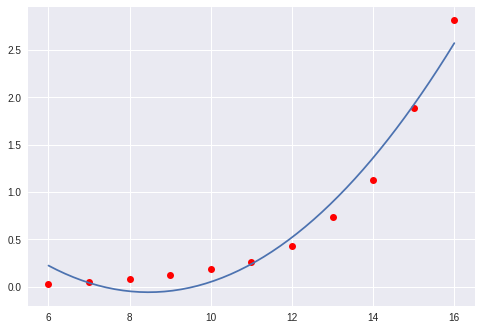

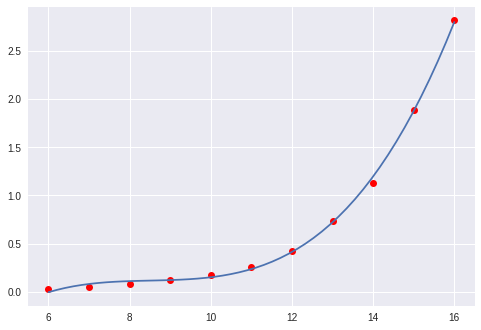

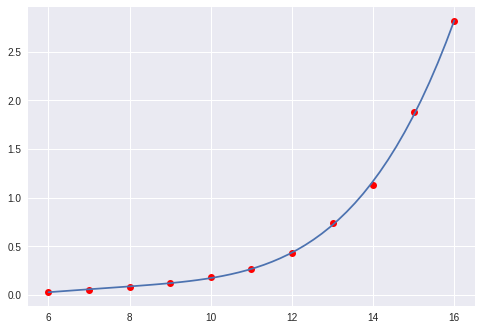

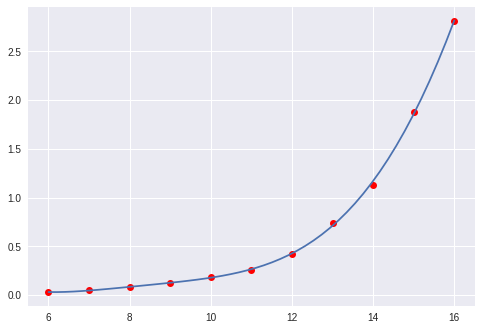

In [2]:
""" Inputs """
# teste 1 slide, should return [1.5 , 1.6]
t1 = np.array([1,2,3,4])
t2 = np.array([3,5,6,8])

# teste 2 slide
t3 = np.array([0.5,1,2,3,4])
t4 = np.array([2500,2400,2000,1800,1500])

# problem 1:
x = np.array([1872, 1890, 1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 1996])
y = np.array([9.9,  14.3, 17.4, 30.6, 41.2, 51.90, 70.2, 93.1, 119.0, 146.2, 157.1])

# problem 2:
x2 = np.array(list(range(6,17)))
y2 = np.array([0.029 , 0.052, 0.079, 0.125, 0.181, 0.261, 0.425, 0.738, 1.130, 1.882, 2.812])



# teste 1 resolução
print("Exemplo 1 Slide")
terms, g, g_exp = adjust_function(t1,t2,1)
print("a = {}, b = {}".format(terms[1],terms[0]))
print("g(3) = {}".format(g(3)))
space = np.linspace(t1[0], t2[-1])
plt.plot(t1, t2, 'ro')
plt.plot(space, g(space))
plt.show()



# teste 2 resolução
print("Exemplo 2 Slide")
terms, g, g_exp = adjust_function(t3,t4,1)
print("a = {}, b = {}".format(terms[1],terms[0]))
for i in range(5,9):
    print("g({}) = {}".format(i, g(i)))
space = np.linspace(t3[0], t3[-1])
plt.plot(t3, t4, 'ro')
plt.plot(space, g(space))
plt.show()


## Exemplo Quadrático UFRGS
## http://www.mat.ufrgs.br/~guidi/grad/MAT01032/calculo_numerico.cap5.pdf
print("Exemplo quadrático UFRGS")
xt = np.array([-2,-1,0,1,2])
yt = np.array([0,1,2,1,0])

terms, g, g_exp = adjust_function(xt,yt,2)
space = np.linspace(xt[0], xt[-1])
plt.plot(xt, yt, 'ro')
plt.plot(space, g(space))
plt.show()



#### Resolução 1
print("Exercício 1")
terms, g, g_exp = adjust_function(x,y,2)
print("a = {}, b = {}, c = {}".format(terms[2],terms[1], terms[0]))
space = np.linspace(x[0], 2014)
plt.plot(x, y, 'ro')
plt.plot(space, g(space))
plt.show()

print("g({}) = {}".format(2000, g(2000)))
print("g({}) = {}".format(2005, g(2005)))
print("g({}) = {}".format(2014, g(2014)))

""" OVERFLOW
print("Exercício 1 Exponencial")
terms, g, g_exp = adjust_function(x,y,1)
print("a = {}, b = {}".format(terms[1],terms[0]))
space = np.linspace(x[0], 2014)
plt.plot(x, y, 'ro')
plt.plot(space, g_exp(space))
plt.show()
"""

#### Resolução 2
for i in range(1,6):
  print("Ajuste de função com grau {}".format(i))
  terms, g, g_exp = adjust_function(x2,y2,i)
  space = np.linspace(x2[0], x2[-1])
  plt.plot(x2, y2, 'ro')
  plt.plot(space, g(space))
  plt.show()